In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/BFLCOMP01/Desktop/ML/Assignment1/uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df1 = df.drop(['Unnamed: 0', 'key'], axis=1)

In [11]:
df1.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [12]:
df1 = df1[(df1.pickup_longitude>=-90) & (df1.pickup_longitude<=90) &
         (df1.pickup_latitude>=-180) & (df1.pickup_latitude<=180) &
         (df1.dropoff_longitude>=-90) & (df1.dropoff_longitude<=90) &
         (df1.dropoff_latitude>=-180) & (df1.dropoff_latitude<=180) 
         ]

In [13]:
df1.shape

(199986, 7)

In [14]:
#Converting distance into kilometers


In [15]:
def transform_distance(longitude1,lattitude1,longitude2,lattitude2):
    long1,lat1,long2,lat2 = map(np.radians,[longitude1,lattitude1,longitude2,lattitude2])
    dist_long = long2-long1
    dist_lat = lat2-lat1
    
    a = np.sin(dist_long/2)**2+np.cos(long1)*np.cos(long2)*np.sin(dist_lat/2)**2
    distance = 2*np.arcsin(np.sqrt(a)) * 6371
    return distance

In [16]:
df1["distance"] = transform_distance(df1.pickup_longitude, df1.pickup_latitude, df1.dropoff_longitude, df1.dropoff_latitude)

In [17]:
df1.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance'],
      dtype='object')

In [18]:
df1.distance

0          0.465181
1          0.678728
2          4.823521
3          1.261639
4          5.369902
            ...    
199995     0.064177
199996     2.442219
199997    14.264792
199998     1.800095
199999     1.499603
Name: distance, Length: 199986, dtype: float64

In [19]:
df2 = df1.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime' ] , axis= 1)

In [20]:
df2.columns

Index(['fare_amount', 'passenger_count', 'distance'], dtype='object')

In [21]:
#check for outliers

In [22]:
def rem_outlier(data):
    Q1 = np.percentile(data,25)
    Q2 = np.percentile(data,50)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return (lower_bound,upper_bound)

In [23]:
df2.columns

Index(['fare_amount', 'passenger_count', 'distance'], dtype='object')

In [24]:
df2.fare_amount

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199986, dtype: float64

In [25]:
lower_bound,upper_bound = rem_outlier(df2.fare_amount)
lower_bound,upper_bound

(-3.75, 22.25)

In [26]:
df2 = df2[(df2.fare_amount>=lower_bound) & (df2.fare_amount<=upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd47737be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd477561c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd47726760>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd47756760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd47756a30>],
 'means': []}

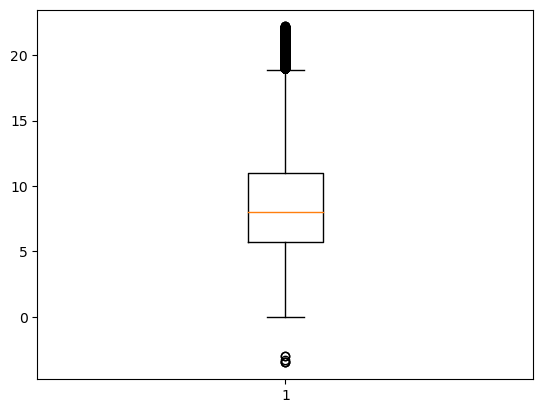

In [27]:
plt.boxplot(df2.fare_amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd489c1850>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd489c1df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd489c1580>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd489d03d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd489d06a0>],
 'means': []}

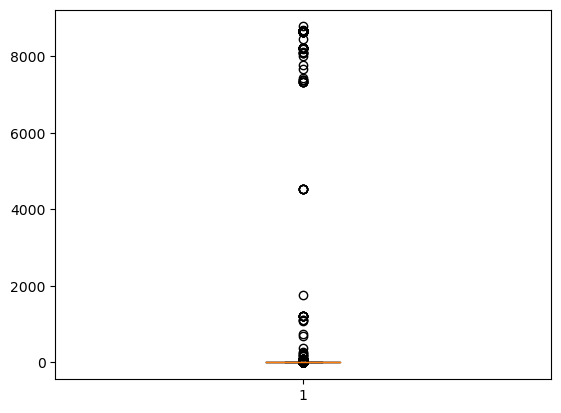

In [28]:
plt.boxplot(df2.distance)

In [29]:
lower_bound,upper_bound = rem_outlier(df2.distance)
lower_bound,upper_bound

(-1.6624740471732327, 4.854120868158857)

In [30]:
df2 = df2[(df2.distance>=lower_bound) & (df2.distance<=upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd472298b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd47229e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd472295e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd47238430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd47238700>],
 'means': []}

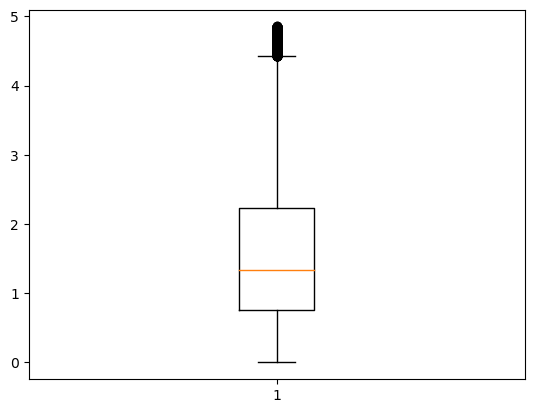

In [31]:
plt.boxplot(df2.distance)

In [32]:
df2.isna().sum()

fare_amount        0
passenger_count    0
distance           0
dtype: int64

In [33]:
df2.shape

(174487, 3)

In [34]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [35]:
df2["distance"] = std.fit_transform(df2[["distance"]])
df2.distance

0        -1.026586
1        -0.831433
2         2.956359
3        -0.298729
5        -1.451700
            ...   
199994   -0.409039
199995   -1.393051
199996    0.780165
199998    0.193348
199999   -0.081262
Name: distance, Length: 174487, dtype: float64

In [36]:
df2["fare_amount"] = std.fit_transform(df2[["fare_amount"]])
df2.fare_amount

0        -0.286485
1        -0.234218
2         1.124744
3        -0.861431
5        -0.965966
            ...   
199994    0.889539
199995   -1.462510
199996   -0.286485
199998    1.542886
199999    1.438350
Name: fare_amount, Length: 174487, dtype: float64

In [37]:
y = df2.fare_amount
y

0        -0.286485
1        -0.234218
2         1.124744
3        -0.861431
5        -0.965966
            ...   
199994    0.889539
199995   -1.462510
199996   -0.286485
199998    1.542886
199999    1.438350
Name: fare_amount, Length: 174487, dtype: float64

In [38]:
x = df2.drop(['fare_amount'], axis=1)
x

,passenger_count,distance
0,1,-1.026586
1,1,-0.831433
2,1,2.956359
3,3,-0.298729
5,1,-1.451700
...,...,...
199994,1,-0.409039
199995,1,-1.393051
199996,1,0.780165
199998,1,0.193348


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [40]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = linear_regression.predict(x_test)
y_pred

array([ 0.20363626,  1.46857862, -0.57777581, ..., -0.14462919,
       -0.55806094, -0.54931619])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error, r2_score,accuracy_score,confusion_matrix,precision_score,classification_report,recall_score

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
y_pred_forest=model.predict(x_test)
y_pred_forest

array([ 0.45336448,  0.91305926, -0.50470321, ..., -0.54625606,
        0.00150986, -0.97485153])

In [45]:
print("Root mean squared for linear regression")
RMSE_l = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE_l

Root mean squared for linear regression


0.7898123001283908

In [46]:
print("Root mean squared for random forest")
RMSE_f = np.sqrt(mean_squared_error(y_test,y_pred_forest))
RMSE_f


Root mean squared for random forest


0.9075791053069752

In [47]:
print("R2 linear regression")
R2_l = r2_score(y_test,y_pred)
R2_l

R2 linear regression


0.37781269762060476

In [48]:
print("R2 for randome forest")
R2_f = r2_score(y_test,y_pred_forest)
R2_f

R2 for randome forest


0.17843423161801208